<a href="https://colab.research.google.com/github/mukulR-rep/python-Basics/blob/main/Amzon_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests

In [4]:
wm_title=[]  
wm_date = []
wm_content = []
wm_rating = []
for i in range(1,150):
    link ="https://www.amazon.in/New-Apple-iPhone-12-128GB/product-reviews/B08L5WVZJ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(link)
    soup = bs(response.content,"html.parser")

In [6]:
title = soup.find_all('a',class_='review-title-content')
review_title = []
for i in range(0,len(title)):
  review_title.append(title[i].get_text())
  review_title[:] = [titles.lstrip('\n') for titles in review_title]
  review_title[:] = [titles.rstrip('\n') for titles in review_title]
  wm_title = wm_title + review_title

In [8]:
rating = soup.find_all('i',class_='review-rating')
review_rating = []
for i in range(2,len(rating)):
  review_rating.append(rating[i].get_text())
  #review_rating.pop(0)
  #review_rating.pop(0)
  review_rating[:] = [reviews.rstrip(' out of 5 stars') for reviews in review_rating]
  wm_rating = wm_rating + review_rating  

In [10]:
review = soup.find_all("span",{"data-hook":"review-body"})
review_content = []
for i in range(0,len(review)):
  review_content.append(review[i].get_text())
  review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
  review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
  wm_content = wm_content + review_content  

In [11]:
dates = soup.find_all('span',class_='review-date')
review_dates = []
for i in range(2,len(rating)):
  review_dates.append(dates[i].get_text())
  review_dates[:] = [reviews.lstrip('Reviewed in India on') for reviews in review_dates]
  #review_dates.pop(0)
  #review_dates.pop(0)
  wm_date  = wm_date + review_dates

In [12]:
print(len(wm_title))
print(len(wm_rating))
print(len(wm_content))
print(len(wm_date))

55
55
55
55


In [13]:
df = pd.DataFrame()
df['Title'] = wm_title
df['Ratings'] = wm_rating
df['Comments'] = wm_content
df['Date'] = wm_date


df['Date'] = pd.to_datetime(df['Date'])
df['Ratings'] = df['Ratings'].astype(float)
df.head(2)

,Title,Ratings,Comments,Date
0,Waste of money.,1.0,Over priced. And without charger too.Not rec...,2020-11-09
1,Waste of money.,1.0,Over priced. And without charger too.Not rec...,2020-11-09


In [14]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)



In [18]:
# clean text data
df["Comments"] = df["Comments"].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df.head(5)
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comments"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

df


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Title,Ratings,Comments,Date,neg,neu,pos,compound
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007
1,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007
2,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351
3,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007
4,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351
5,best iphone phone year,5.0,best iphone yes max model give well screen ove...,2020-11-20,0.125,0.542,0.333,0.9134
6,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007
7,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351
8,best iphone phone year,5.0,best iphone yes max model give well screen ove...,2020-11-20,0.125,0.542,0.333,0.9134
9,massive display monster camera 👌🏽,5.0,pro great display battery camera usability eas...,2020-11-19,0.000,0.694,0.306,0.7650


In [19]:
# add number of characters column
df["nb_chars"] = df["Comments"].apply(lambda x: len(x))


In [20]:
# add number of words column
df["nb_words"] = df["Comments"].apply(lambda x: len(x.split(" ")))

In [21]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comments"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [23]:
# transform each Comment into a vector data
doc2vec_df = df["Comments"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 6)
tfidf_result = tfidf.fit_transform(df["Comments"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

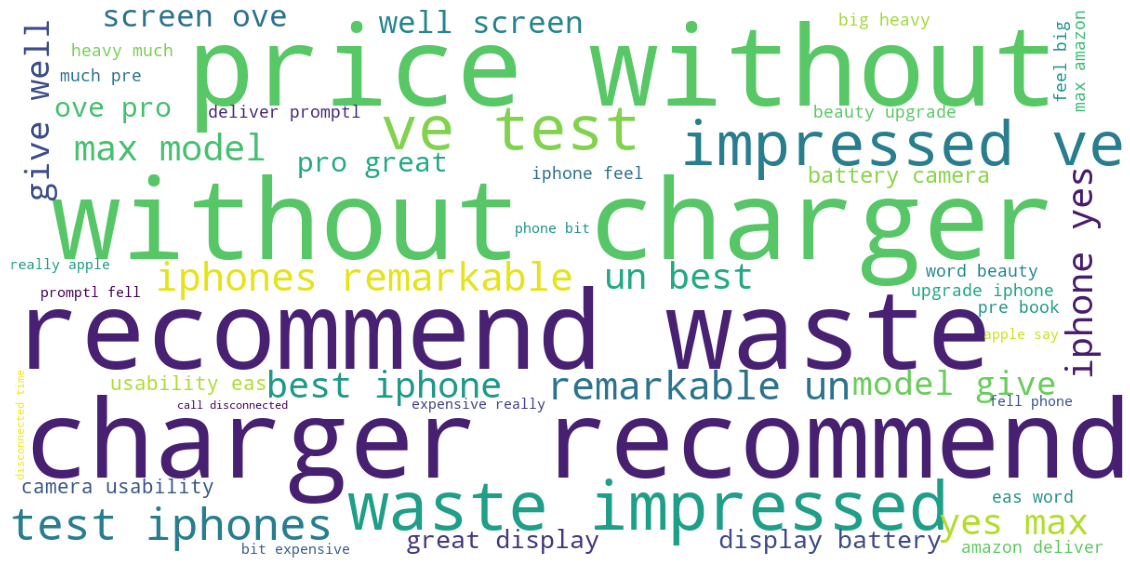

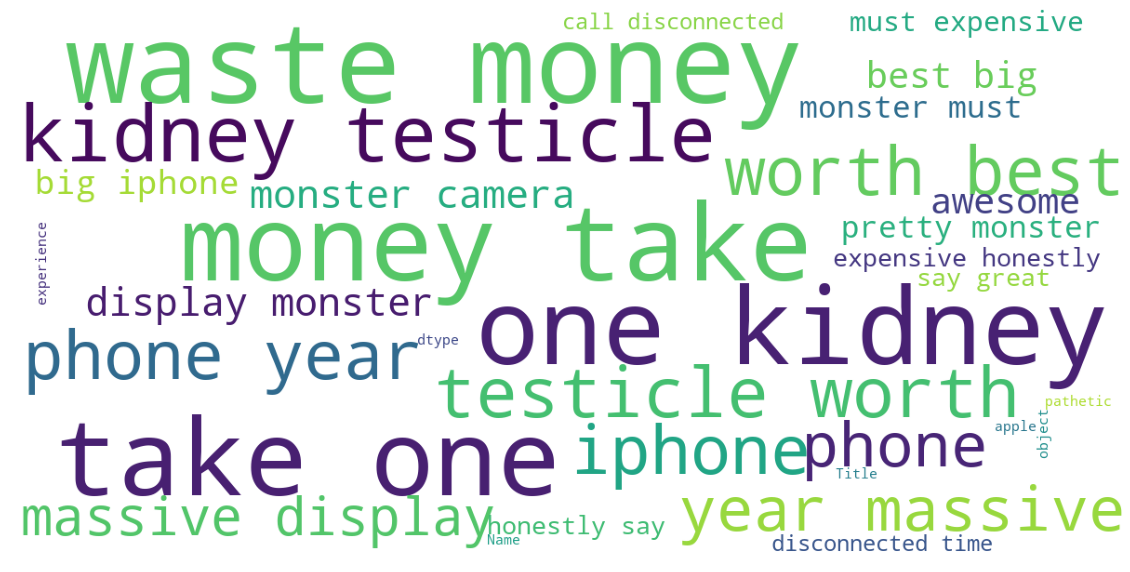

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df["Comments"])
show_wordcloud(df["Title"])

In [25]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)


df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head(2)

df_recent = df[(df['Year']== 2020) & (df['Month'] != 8)]
df_recent.head(2)

,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_access,word_afford,word_anyone,word_apple,word_battery,word_beast,word_beauty,word_best,word_big,word_buy,word_call,word_camera,word_case,word_ceramic,word_charger,word_clear,word_cooler,word_country,word_day,word_decent,word_discomfort,word_display,word_duty,word_ease,word_enough,...,word_sensitivity,word_shame,word_since,word_slmost,word_still,word_suggest,word_sure,word_test,word_thats,word_think,word_though,word_time,word_too,word_totally,word_touch,word_unquestionably,word_upgradation,word_upgrade,word_usa,word_usability,word_use,word_value,word_variant,word_ve,word_video,word_wait,word_waste,word_way,word_well,word_whereas,word_whole,word_whop,word_within,word_without,word_word,word_would,word_wouldn,word_yes,Month,Year
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.0,-0.6007,76,11,-0.025741,0.038828,0.007710,-0.087499,-0.063136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286194,0.0,0.0,0.0,0.277919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,0.0,0.0,0.0,0.0,11,2020
1,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.0,-0.6007,76,11,-0.025354,0.039899,0.007372,-0.088732,-0.064975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286194,0.0,0.0,0.0,0.277919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,0.0,0.0,0.0,0.0,0.0,0.0,0.315117,0.0,0.0,0.0,0.0,11,2020
